# Seuils d'instabilité de Kelvin Helmoltz
La relation de dispersion généralisée de l'instabilité de Kelvin Helmoltz s'écrit :
$$\rho_2 \left[ g \, k - (s + i\, k_x\, U_2)^2\right] = \rho_1 \, \left[ g\, k + {s^2 \over \tanh(k\, h_r)}\right]\;.$$
On adimensionne cette relation en choisissant $[L]=h_r$ pour l'unité d'espace et $[T]=h_r/U_2$ pour l'unité de temps. On pose alors $k = \hat k/h_r$, $k_x=\hat k_x/h_r$ et $s=\hat s\, U_2/h_r$. La relation de dispersion généralisée s'écrit alors :
$$ \xi\, \left[ \hat k - F^2 (\hat s + i\, \hat k)^2 \right] = \hat k + F^2 \, \hat s / \tanh(\hat k)\;,$$
avec $\xi = \rho_2/\rho_1$ et $F = U_2/ \sqrt(g\, h_r)$. 
On cherche ici à déterminer les régions de stabilité et d'instabilité dans le quart de plan $(\xi, F)$ avec $\xi>0$ et $F>0$. 

## Critère analytique dans le cas 2D
On suppose ici que $k_y=0$ et on note $s$ et $k$ plutôt que $\hat s$ et $\hat k$ les grandeurs adimensionnées. La relation de dispersion généralisée est de la forme $a\, s^2 + 2\,  b \, s +c $ avec :
$$a=F^2\left( \xi + {1\over \tanh k} \right)\, \quad b= i\, k\,\xi\, F^2\, \;\; \hbox{et}\;\; c= k(1-\xi) - \xi F^2 k^2\;.$$
Le discriminant réduit de cette équation du second degré est 
$$\Delta'= b^2 - a\, c= {F^2 k\over \tanh k} \left[ F^2 k^2 \xi - \xi\,(
  \tanh k-1) + \tanh (k) \, \xi^2 -1\right]\;.$$
Si $\Delta'(\xi,k,F)\le 0$,les racines sont imaginaires pures et le modes $k$ est marginal. Si $\Delta'(\xi,k,F) >0$, on a $\Re(s) = \pm \sqrt{\Delta'}/a$ et le mode $k$ est instable. La condition d'instabilité s'écrit donc 
$$ F > {\cal F}(\xi, k) = \left[ {1\over \xi} + \tanh (k)\; (1-\xi) -1 \right] \, {1\over k} \;.$$


# Visualisation dans un plan $(k,F)$ pour des valeurs $\xi\le 1$
Dans le programme ci-dessous, on trace le contour du maximum des  parties réelles des racines $s$ dans un plan $(k,F)$ pour différentes valeurs de $F$ et on compare avec les frontière $F={\cal F}(\xi,k)$. 
On se limite au cas $\xi \in [0, 1]$ dans la mesure où tous les modes sont instables lorsque $\xi= \rho_2/\rho_1 >1$ : le fluide du haut est plus lourd que le fluide du bas (instabilité de Rayleigh-Taylor).

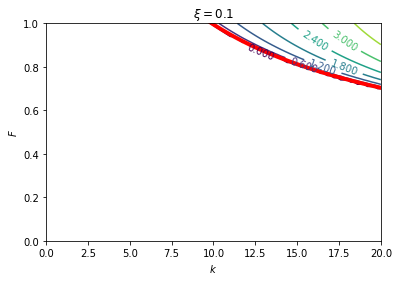

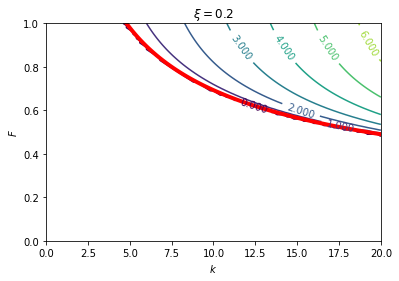

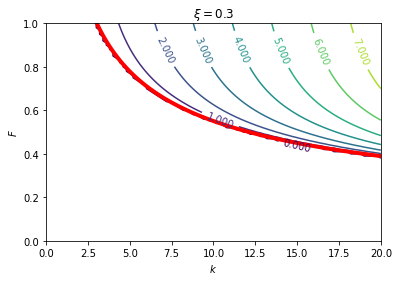

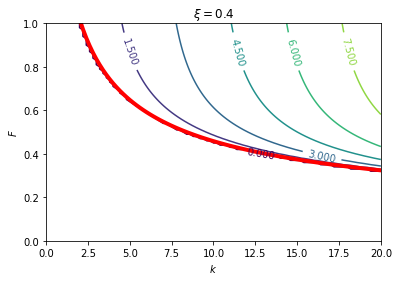

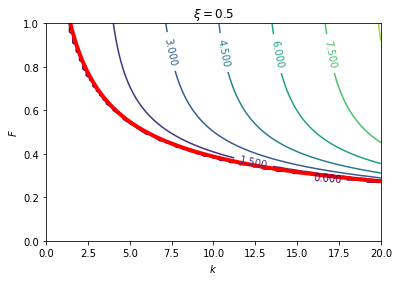

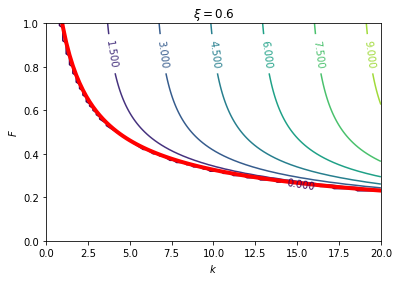

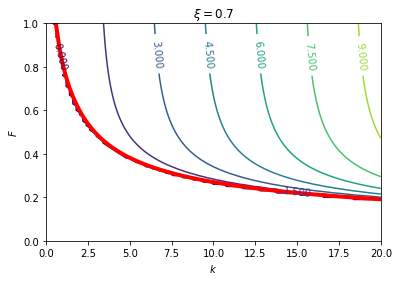

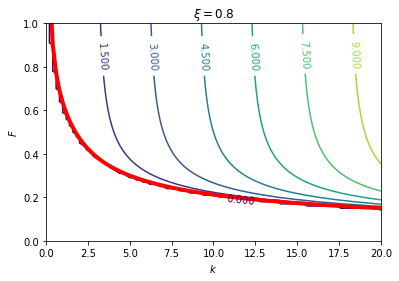

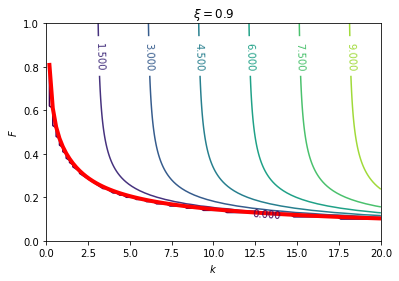

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt


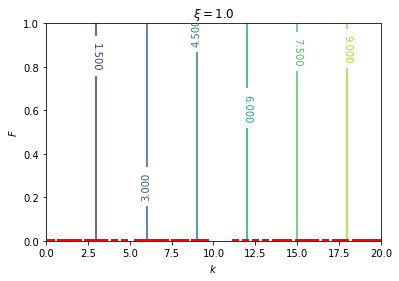

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# parametres
ximax=1; Fmax=1; kmax=20; 
Nxi=10; NF=100; Nk=100;
xi=np.linspace(ximax/Nxi,ximax,Nxi); 
kk=np.linspace(kmax/Nk,kmax,Nk)
F=np.linspace(Fmax/NF,Fmax,NF);
K,FF = np.meshgrid(kk,F)

# boucle sur xi
for i in range(Nxi):
    XI=xi[i]
    a=FF**2*(XI+1/np.tanh(K))
    #a=FF**2*(XI+1)
    b=2*1j*K*XI*FF**2
    c=K*(1-XI)-XI*FF**2*K**2
    S=np.zeros((NF,Nk,2),dtype=complex)
    Smax=np.zeros((NF,Nk))
    # racines
    for k in range(Nk):
        for j in range(NF):
            S[j,k,:]=np.roots([a[j,k],b[j,k],c[j,k]])
            Sm=max(np.real(S[j,k,:]))
            if Sm < 1.e-10: 
                Sm=0
            Smax[j,k]=Sm
    # figure
    fig, ax = plt.subplots()
    CS=ax.contour(K,FF,Smax)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_xlabel(r'$k$')
    ax.set_ylabel(r'$F$')
    ax.set_xlim(0,kmax)
    ax.set_ylim(0,Fmax)
    title=r"$\xi=$"+str(round(xi[i],2))
    ax.set_title(title)
    T=np.tanh(kk)
    thr=np.sqrt((1/XI+T-1-T*XI)/kk)
    plt.plot(kk,thr,"red",linewidth=4)
    plt.show()


## Conclusion
Les visualisations et le critère de stabilité montre que le système 2D ($k_y=0$) est toujours instable pour des nombres d'ondes $k_x$ suffisamment grands. En pratique, la dissipation, négligée dans le relation de dispersion généralisée, stabilise les petites échelles ($k$ grand). Il y a alors un seuil de stabilité qui dépend de la dissipation (nombre de Reynolds). 